### Generating tensorflow model for Yolov4

In [4]:
### dowload pretrained weights for yoloV4 and yoloV4 tiny and put it in data folder
## for yolov4
!python save_model.py --weights ./data/yolov4.weights --output ./checkpoints/yolov4-416 --input_size 416 --model yolov4
!python save_model.py --weights ./data/yolov4-tiny.weights --output ./checkpoints/yolov4-tiny-416 --input_size 416 --model yolov4 --tiny

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 416, 416, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 416, 416, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
tf_op_layer_Softplus (TensorFlo [(None, 416, 416, 32 0           batch_normalization[0][0]        
_______________________________________________________________________________________

2024-02-19 18:28:43.369445: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:28:43.369573: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-19 18:28:44.161518: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2024-02-19 18:28:44.195132: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.86GHz coreCount: 82 deviceMemorySize: 24.00GiB deviceMemoryBandwidth: 871.81GiB/s
2024-02-19 18:28:44.195906: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:28:44.196408: W tensorflow/stream_executor

### testing the model

In [2]:
# Run yolov4 on image
!python detect.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --image ./data/test2.jpg --output ./detections/test2_yolov4.jpg

!python detect.py --weights ./checkpoints/yolov4-tiny-416 --size 416 --model yolov4 --image ./data/test2.jpg --tiny --output ./detections/test2_yolov4_tiny.jpg

2024-02-19 18:31:37.377024: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:31:37.377203: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-19 18:31:38.194682: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2024-02-19 18:31:38.240440: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.86GHz coreCount: 82 deviceMemorySize: 24.00GiB deviceMemoryBandwidth: 871.81GiB/s
2024-02-19 18:31:38.241242: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:31:38.241758: W tensorflow/stream_executor

In [12]:
## helper function to show output predictions
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

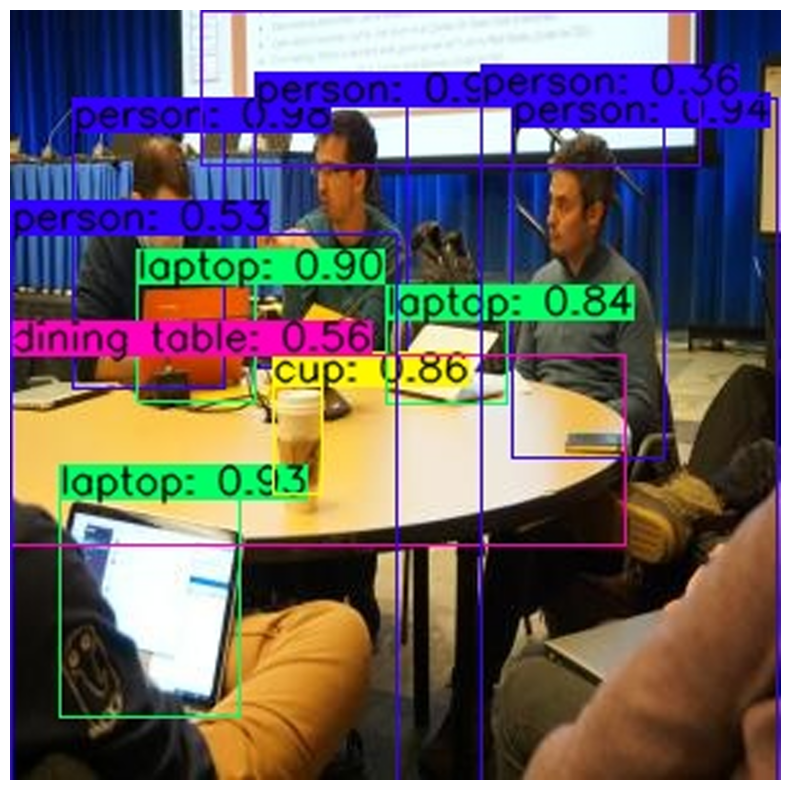

In [4]:
imShow('detections/test2_yolov4.jpg')

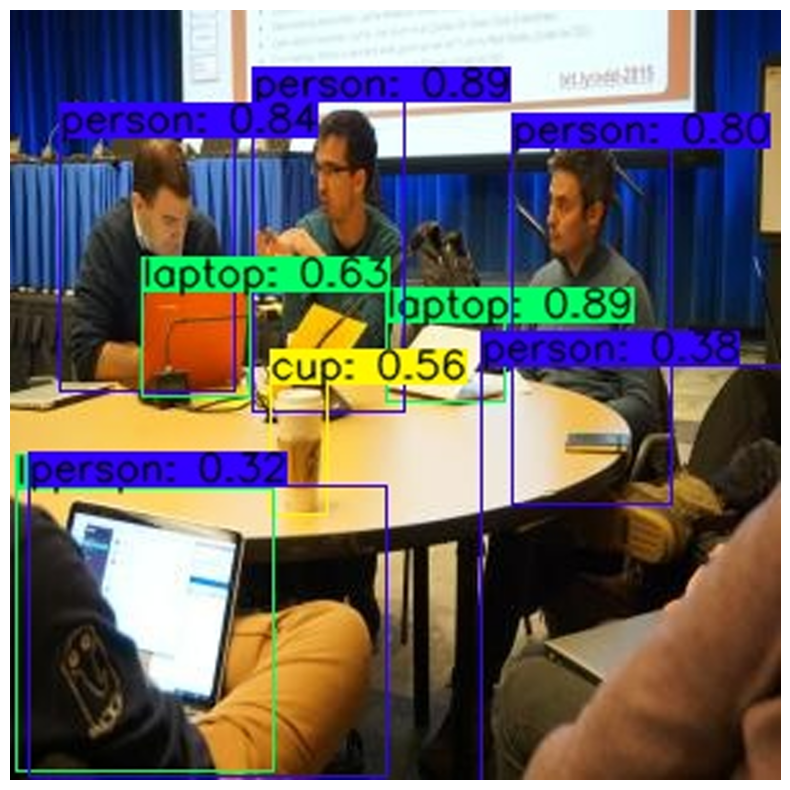

In [5]:
imShow('detections/test2_yolov4_tiny.jpg')

### converting to tflite model

In [2]:
# Save tf model for tflite converting
!python save_model.py --weights ./data/yolov4.weights --output ./checkpoints/yolov4-416 --input_size 416 --model yolov4 --framework tflite

# yolov4
!python convert_tflite.py --weights ./checkpoints/yolov4-416 --output ./checkpoints/yolov4-416.tflite

# yolov4 quantize float16
!python convert_tflite.py --weights ./checkpoints/yolov4-416 --output ./checkpoints/yolov4-416-fp16.tflite --quantize_mode float16

# yolov4 quantize int8
!python convert_tflite.py --weights ./checkpoints/yolov4-416 --output ./checkpoints/yolov4-416-int8.tflite --quantize_mode int8


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 416, 416, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 416, 416, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
tf_op_layer_Softplus (TensorFlo [(None, 416, 416, 32 0           batch_normalization[0][0]        
_______________________________________________________________________________________

2024-02-19 18:40:28.170035: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:40:28.170192: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-19 18:40:28.988582: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2024-02-19 18:40:29.022839: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.86GHz coreCount: 82 deviceMemorySize: 24.00GiB deviceMemoryBandwidth: 871.81GiB/s
2024-02-19 18:40:29.023702: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:40:29.024238: W tensorflow/stream_executor

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 416, 416,   3]), 'shape_signature': array([ -1, 416, 416,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'Identity', 'index': 969, 'shape': array([    1, 10647,     4]), 'shape_signature': array([ 1, -1,  4]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'Identity_1', 'index': 948, 'shape': array([    1, 10647,    80]), 'shape_signature': array([ 1, -1, 80]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {

2024-02-19 18:40:55.472792: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:40:55.472952: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-19 18:40:56.270245: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2024-02-19 18:40:56.305369: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.86GHz coreCount: 82 deviceMemorySize: 24.00GiB deviceMemoryBandwidth: 871.81GiB/s
2024-02-19 18:40:56.306104: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:40:56.306619: W tensorflow/stream_executor

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 416, 416,   3]), 'shape_signature': array([ -1, 416, 416,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'Identity', 'index': 969, 'shape': array([    1, 10647,     4]), 'shape_signature': array([ 1, -1,  4]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'Identity_1', 'index': 948, 'shape': array([    1, 10647,    80]), 'shape_signature': array([ 1, -1, 80]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {

2024-02-19 18:41:12.334938: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:41:12.335079: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-19 18:41:13.195394: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2024-02-19 18:41:13.228044: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.86GHz coreCount: 82 deviceMemorySize: 24.00GiB deviceMemoryBandwidth: 871.81GiB/s
2024-02-19 18:41:13.228866: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:41:13.229405: W tensorflow/stream_executor

### converting tiny yolov4 to tflite

In [21]:
# Save tf model for tflite converting
!python save_model.py --weights ./data/yolov4-tiny.weights --output ./checkpoints/yolov4-tiny-416 --input_size 416 --model yolov4 --framework tflite --tiny

# yolov4
!python convert_tflite.py --weights ./checkpoints/yolov4-tiny-416 --output ./checkpoints/yolov4-tiny-416.tflite 

# yolov4 quantize float16
!python convert_tflite.py --weights ./checkpoints/yolov4-tiny-416 --output ./checkpoints/yolov4-tiny-416-fp16.tflite --quantize_mode float16 

# yolov4 quantize int8
#!python convert_tflite.py --weights ./checkpoints/yolov4-tiny-416 --output ./checkpoints/yolov4-tiny-416-int8.tflite --quantize_mode int8 --dataset ./data/dataset/val2017.txt

2024-02-19 18:54:06.114585: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:54:06.114751: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-19 18:54:06.927788: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2024-02-19 18:54:06.960486: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.86GHz coreCount: 82 deviceMemorySize: 24.00GiB deviceMemoryBandwidth: 871.81GiB/s
2024-02-19 18:54:06.961292: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:54:06.961805: W tensorflow/stream_executor

### run tflite model for yolov4

In [17]:
# Run demo tflite model
!python detect.py --weights ./checkpoints/yolov4-416-fp16.tflite --size 416 --model yolov4 --image ./data/test2.jpg --framework tflite --output ./detections/test1_yolov4_lite.jpg
#!python detect.py --weights ./checkpoints/yolov4-416-int8.tflite --size 416 --model yolov4 --image ./data/test2.jpg --framework tflite --output ./detections/test1_yolov4_lite_in8.jpg

2024-02-19 18:49:51.062326: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:49:51.062475: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-19 18:49:51.888217: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2024-02-19 18:49:51.921395: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.86GHz coreCount: 82 deviceMemorySize: 24.00GiB deviceMemoryBandwidth: 871.81GiB/s
2024-02-19 18:49:51.922209: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:49:51.922717: W tensorflow/stream_executor

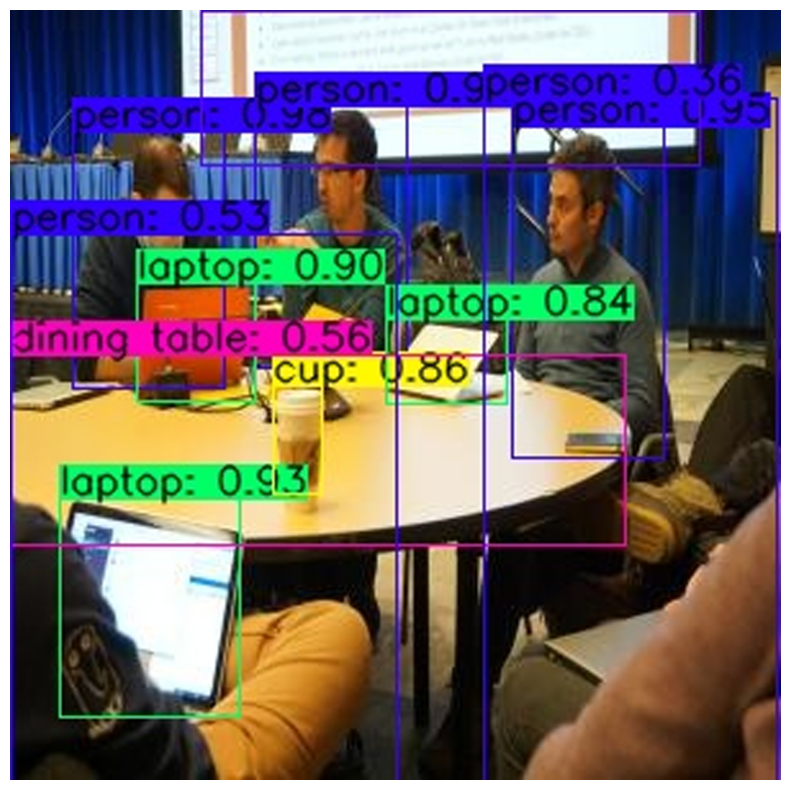

In [18]:
imShow('detections/test1_yolov4_lite.jpg')

In [19]:
# Run demo tflite model
!python detect.py --weights ./checkpoints/yolov4-tiny-416-fp16.tflite --size 416 --model yolov4 --image ./data/test2.jpg --framework tflite --output ./detections/test1_yolov4_tiny_lite.jpg

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 416, 416,   3]), 'shape_signature': array([ -1, 416, 416,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'Identity', 'index': 233, 'shape': array([   1, 2535,    4]), 'shape_signature': array([ 1, -1,  4]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'Identity_1', 'index': 212, 'shape': array([   1, 2535,   80]), 'shape_signature': array([ 1, -1, 80]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


2024-02-19 18:50:23.960003: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:50:23.960176: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-19 18:50:24.785740: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2024-02-19 18:50:24.820803: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.86GHz coreCount: 82 deviceMemorySize: 24.00GiB deviceMemoryBandwidth: 871.81GiB/s
2024-02-19 18:50:24.821569: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2024-02-19 18:50:24.822299: W tensorflow/stream_executor

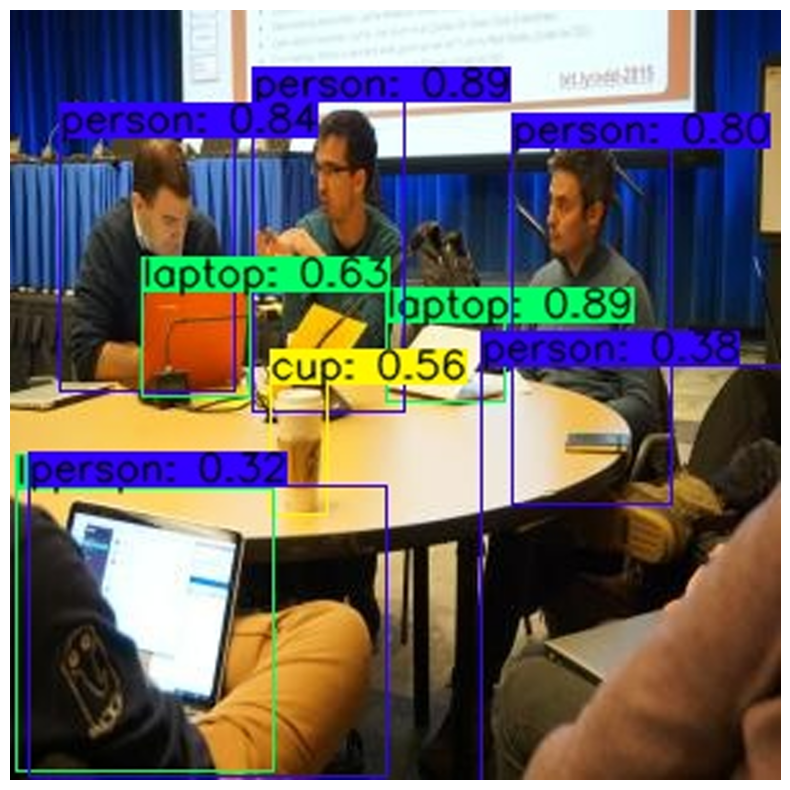

In [20]:
imShow('detections/test1_yolov4_tiny_lite.jpg')

In [4]:
!cd

c:\Users\ASD\Documents\computer_vision_code\Darknet\yoloV4\Pretrained Weights for Coco Dataset


In [2]:
!cd scripts
!python coco_convert.py --input ./coco/annotations/instances_val2017.json --output val2017.pkl

The system cannot find the path specified.


(null): can't open file 'coco_convert.py': [Errno 2] No such file or directory


### References
Dataset https://www.kaggle.com/datasets/thepbordin/indoor-object-detection <br>
https://github.com/hunglc007/tensorflow-yolov4-tflite